##  Applied Stats

### 1. Import the necessary libraries

In [1]:
# Import the necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import copy
import scipy.stats as stats

### 2. Read the data as a data frame

In [2]:
#### Read the data as a data frame ####
insdata = pd.read_csv('insurance.csv')
insdata.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


### 3. Perform basic EDA which should include the following and print out your insights at every step.
#### a. Shape of the data

In [3]:
#### a. Shape of the data  ####
insdata.shape

## insigts
# The data has 1338 data rows with 7 attributes. 

(1338, 7)

#### b. Data type of each attribute

In [4]:
#### b. Data type of each attribute ####
insdata.info()

## insigts
# 2 integer types(age,children), 2 float types(bmi,charges) and 3 object types(sex,smoker,region)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
age         1338 non-null int64
sex         1338 non-null object
bmi         1338 non-null float64
children    1338 non-null int64
smoker      1338 non-null object
region      1338 non-null object
charges     1338 non-null float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


#### c. Checking the presence of missing values

In [5]:
#### c. Checking the presence of missing values ####
insdata.isnull().values.any() 

## insigts
# No missing values in the dataset. We can check this by other techniques like below

False

In [6]:
insdata.isna().apply(pd.value_counts) 

## not null count is same for all the attributes

,age,sex,bmi,children,smoker,region,charges
False,1338,1338,1338,1338,1338,1338,1338


In [7]:
insdata.isnull().sum()

# nulls count for all attributes is 0

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

#### d. 5 point summary of numerical attributes

In [8]:
#### d. 5 point summary of numerical attributes ####
insdata.describe().T

## insigts
# age range is between 10 to 64 years with mean of 39.2
# bmi is between 15.9 to 53.13 with mean of 30.6
# 50% of them have with less than 2 children, max upto 5 children we can found.
# for charges there is a big difference between mean and the median. 25% only spent more than 16639.

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


#### e. Distribution of ‘bmi’, ‘age’ and ‘charges’ columns.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002C51A0D2CC8>,
      dtype=object)

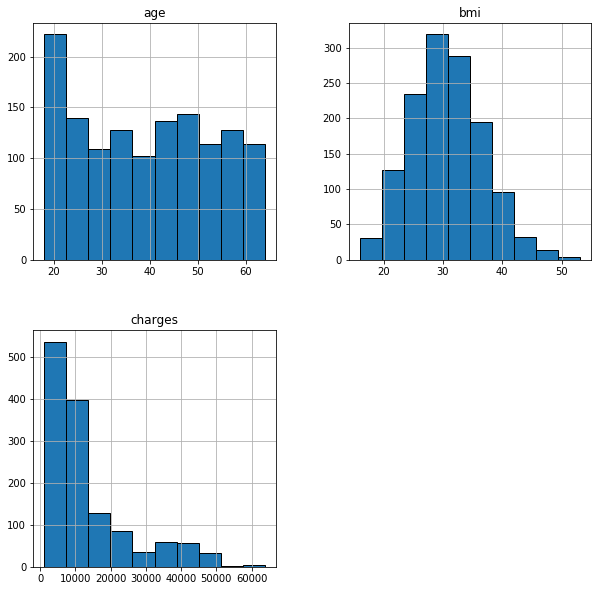

In [9]:
#### e. Distribution of ‘bmi’, ‘age’ and ‘charges’ columns. ####
insdata.hist(column=['bmi', 'age','charges'],figsize=(10,10),edgecolor = 'black',)

## insights
# bmi distribution is normal with a bell curve
# Age distribution is uniform
# Charges are highly skewed towards right

#### f. Measure of skewness of ‘bmi’, ‘age’ and ‘charges’ columns

In [10]:
#### f. Measure of skewness of ‘bmi’, ‘age’ and ‘charges’ columns ####
from scipy.stats import skew
bmiskew=skew(insdata['bmi'])
ageskew=skew(insdata['age'])
chargesskew=skew(insdata['charges'])
print("bmi skew =",bmiskew)
print("age skew =",ageskew)
print("charges skew =",chargesskew)

## insights
# age is not skewed, bmi is also not that much skewed but charges are highly skewed

bmi skew = 0.28372857291709386
age skew = 0.055610083072599126
charges skew = 1.5141797118745743


#### g. Checking the presence of outliers in ‘bmi’, ‘age’ and ‘charges columns

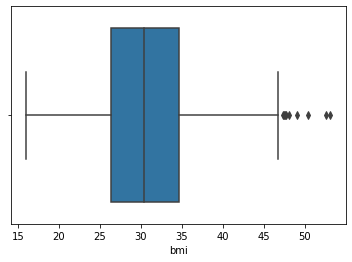

In [11]:
#### g. Checking the presence of outliers in ‘bmi’, ‘age’ and ‘charges columns ####
sns.boxplot(x=insdata['bmi']) 

## insights
# Outliers present for 'bmi'

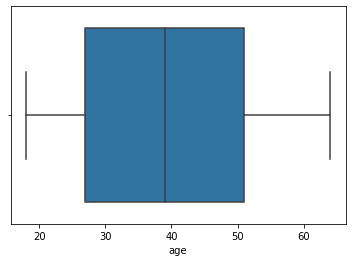

In [12]:
sns.boxplot(x=insdata['age']) 

## insights
# No outliers for 'age'

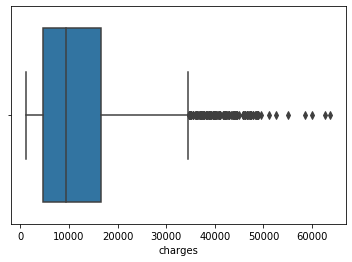

In [13]:
sns.boxplot(x=insdata['charges']) 

## insights
# Outliers are high for 'charges'

#### h.Distribution of categorical columns (include children)

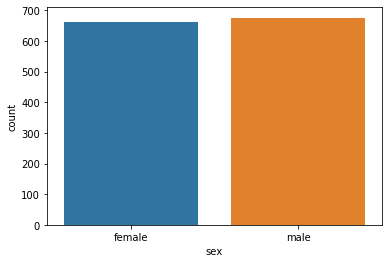

In [14]:
#### h.Distribution of categorical columns (include children) ####
sns.countplot(x="sex",data=insdata)

## insights
# sex is almost equally distributed

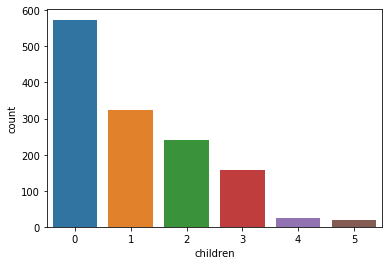

In [15]:
sns.countplot(x="children",data=insdata)

## insights
# children data is distributed in decrement order as more children less data we found

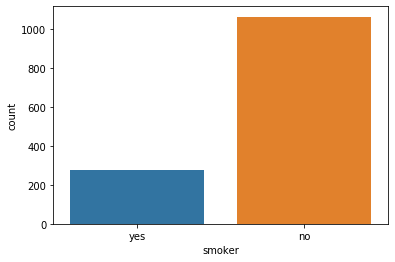

In [16]:
sns.countplot(x="smoker",data=insdata)

## insights
# very less smokers found compare to non-smokers.

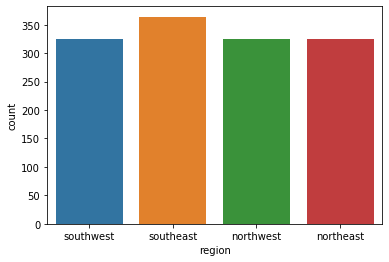

In [17]:
sns.countplot(x="region",data=insdata)

## insights
# almost data is equally distributed in all the regions. southeast has more compare to other regions.

#### i. Pair plot that includes all the columns of the data frame

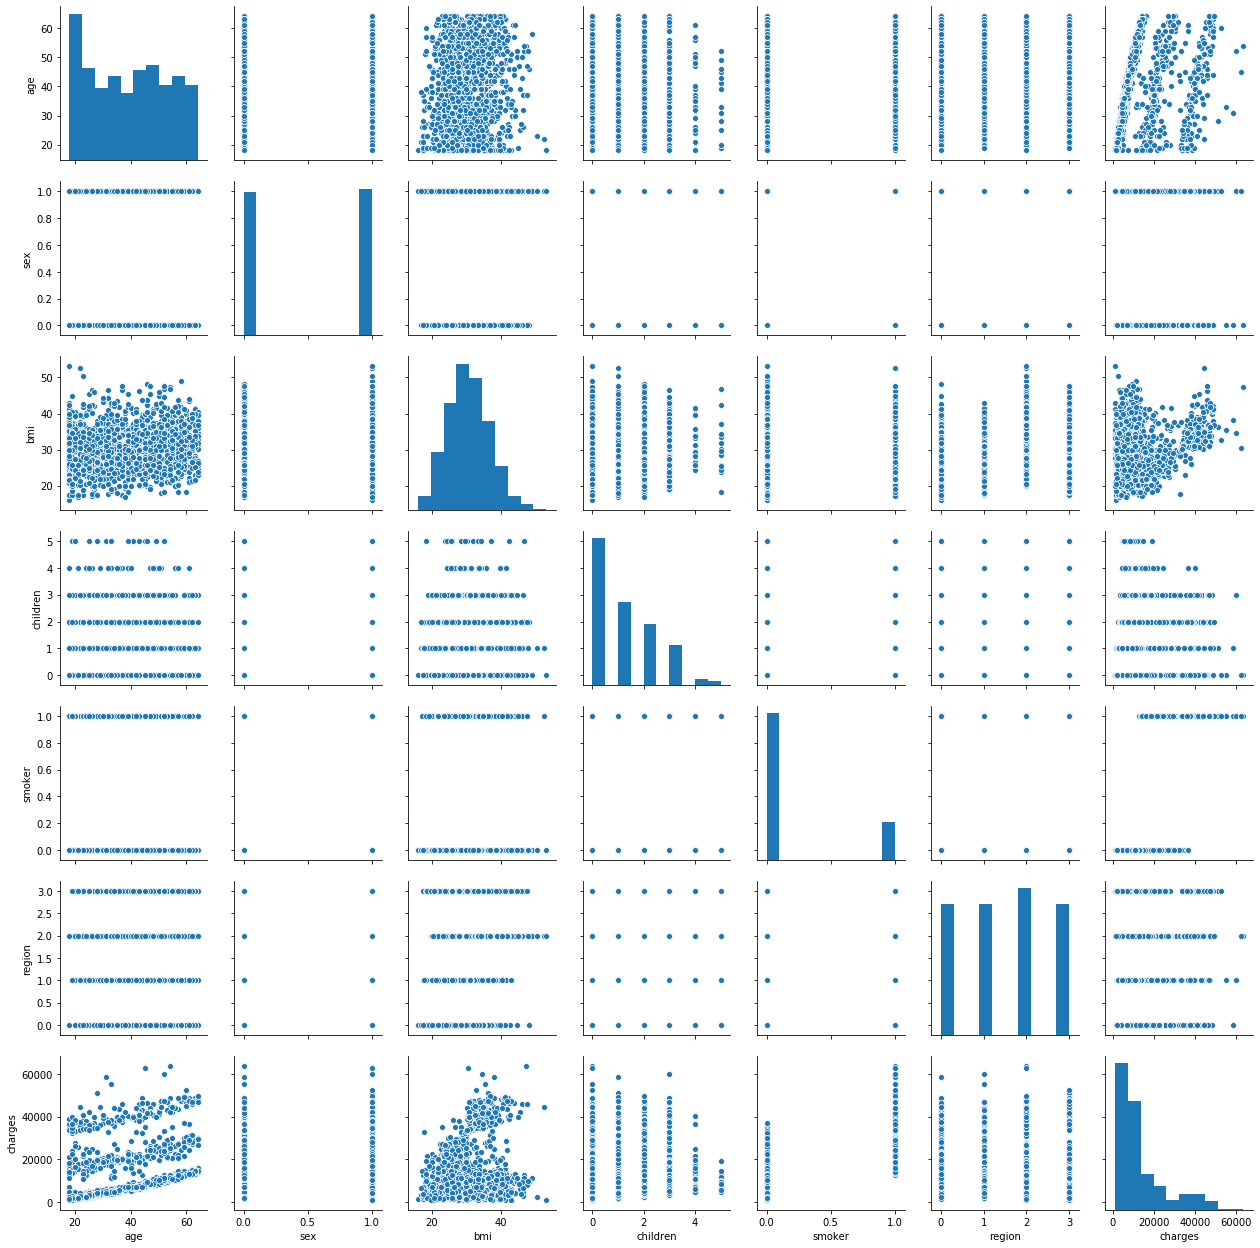

In [18]:
#### i. Pair plot that includes all the columns of the data frame

insdata_extra = copy.deepcopy(insdata)
insdata_extra.loc[:,['sex', 'smoker', 'region']] = insdata.loc[:,['sex', 'smoker', 'region']].apply(LabelEncoder().fit_transform) 
# insdata_extra.head()
sns.pairplot(insdata_extra)

## insights
# age and charges are positively corelated means age increases charges are increasing
# smokers are more chargeble than non-smokers

### 4. Answer the following questions with statistical evidence
#### a. Do charges of people who smoke differ significantly from the people who don't?

,charges,smokerInt
charges,1.000000,0.787251
smokerInt,0.787251,1.000000


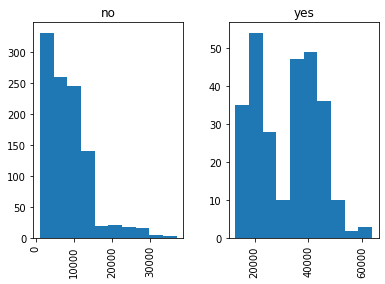

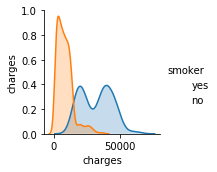

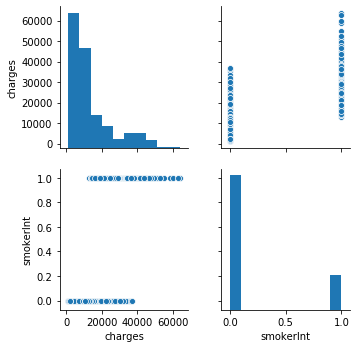

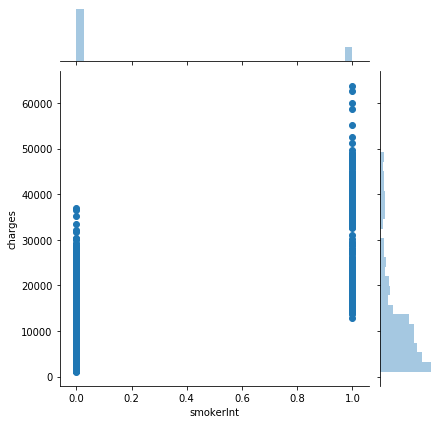

In [27]:
#### 4. Answer the following questions with statistical evidence ####
#### a. Do charges of people who smoke differ significantly from the people who don't? ####
insdata.hist(by='smoker',column = 'charges')
sns.pairplot(insdata, vars=["charges"],hue="smoker") 
df1=insdata[['charges','smoker']] ## Trying to get the corelation between smokers and the charges as a numerical value. Subset of dataframe with only smoker and charges attributes.
df1.head()
df1.loc[:,'smokerInt']=(df1.loc[:,'smoker']=='yes').astype(int) 
#df1.head() 
sns.pairplot(df1)
sns.jointplot(df1['smokerInt'],df1['charges'])
df1.corr() 


## insights
# The correlation between Charges and Smoker is 0.787251, seems like there is corelation between them.
# Below different graphs shows the relation of distribution between smokers and the charges
# non-smokers max charges are below 40000 where as smokers charges are more than 700000
# For statistical evidence, we will go for t-test

In [20]:
# We can do a T-test to check the corelation between smokers and the charges
Ho = "Charges of smoker and non-smoker are same"   # Null Hypothesis
Ha = "Charges of smoker and non-smoker are not the same"   # Alternate Hypothesis

smoker_charges = np.array(df1[df1.smoker == 'yes'].charges)  # smokers charges array
non_smoker_charges = np.array(df1[df1.smoker == 'no'].charges) # non-smokers charges array

t_statistic, p_value  = stats.ttest_ind(smoker_charges,non_smoker_charges, axis = 0)  #t-test to compare two arrays

print("t_statistic= ",t_statistic)
print("p_value = ",p_value)

## insights
# As the p_value is very low compare to 0.05 (level of significant is 5%) we can reject the null hypothesis, so we can conclude the alternate hypothesis.
# So, charges of people who smoke differ significantly from the people who don't

t_statistic=  46.664921172723716
p_value =  8.271435842177219e-283


#### b. Does bmi of males differ significantly from that of females?

,bmi,sexInt
bmi,1.000000,0.046371
sexInt,0.046371,1.000000


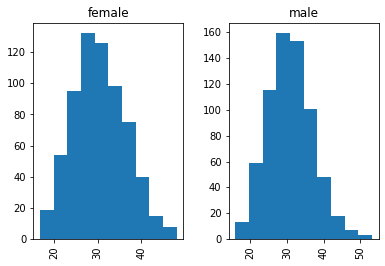

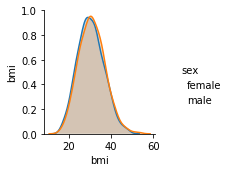

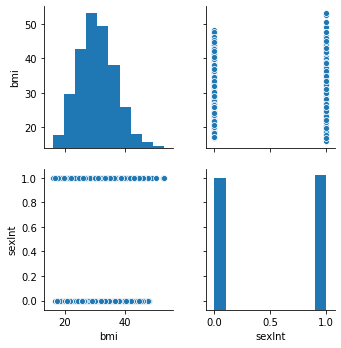

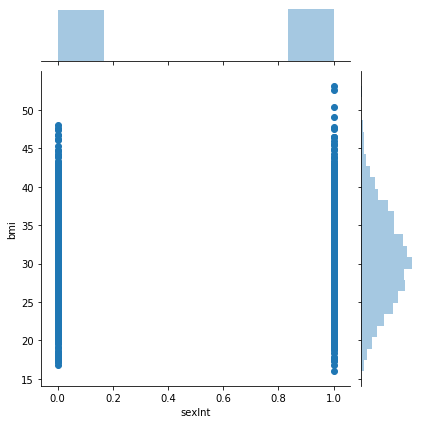

In [21]:
#### b. Does bmi of males differ significantly from that of females? ####
insdata.hist(by="sex",column='bmi') 
sns.pairplot(insdata, vars=["bmi"],hue="sex") 
df2=insdata[['bmi','sex']] 
df2.head()
df2.loc[:,'sexInt']=(df2.loc[:,'sex']=='male').astype(int) ## Creating one more numerical attribute from categorical attribute smoker
df2.head() 
sns.pairplot(df2)
sns.jointplot(df2['sexInt'],df2['bmi'])
df2.corr() 

## insights
# The correlation between Charges and Smoker is 0.046371,  we need to do t-test
# Below different graphs shows the relation between sex and the bmi
# For statistical evidence, we need to conform the relation between sex and bmi through t-test

In [22]:
#### We can do a T-test to check the corelation between bmi and sex
Ho = "bmi of males and females are not significantly differ"   #  Null Hypothesis
Ha = "bmi of males differ significantly from that of females"   #  Alternate Hypothesis

male_bmi = np.array(df2[df2.sex == 'male'].bmi)  
female_bmi = np.array(df2[df2.sex == 'female'].bmi) 

t_static, p_value  = stats.ttest_ind(male_bmi,female_bmi, axis = 0)  

print("t_statistic= ",t_statistic)
print("p_value = ",p_value)

## insights
# As the p_value is greater than 0.05 (level of significant is 5%) we failed to reject the null hypothesis
# So, bmi of males and females are not significantly differ


t_statistic=  46.664921172723716
p_value =  0.08997637178984932


#### c. Is the proportion of smokers significantly different in different genders?

,sexInt,smokerInt
sexInt,1.000000,0.076185
smokerInt,0.076185,1.000000


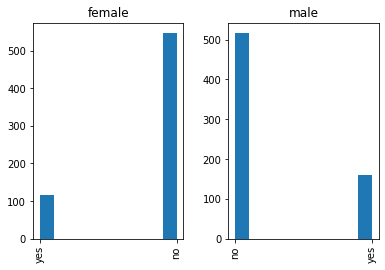

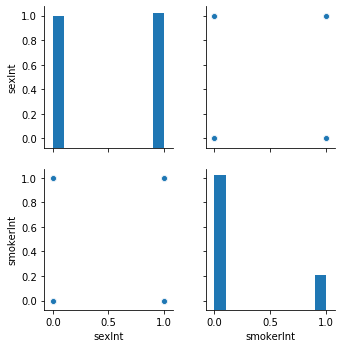

In [23]:
#### c. Is the proportion of smokers significantly different in different genders? ####
insdata.hist(by='sex',column = 'smoker')
df3=insdata[['smoker','sex']] ## Trying to get the corelation between sex and the bmi as a numerical value. Subset of dataframe with only sex and bmi attributes.
df3.head()
df3.loc[:,'sexInt']=(df3.loc[:,'sex']=='male').astype(int)
df3.loc[:,'smokerInt']=(df3.loc[:,'smoker']=='yes').astype(int)
df3.head() 
sns.pairplot(df3)
df3.corr() 

## insights
# Based on the below graphs we cannt say whether there is an effect of sex on smokers. 
# For statistical evidence, as both are categorical variables we will go for chi-sqare test

In [24]:
# Chi_square test to check if sex has an effect on smokers
Ho = "gender has no effect on smokers"   # Null Hypothesis
Ha = "gender has an effect on smokers"   # Alternate Hypothesis

crosstab = pd.crosstab(df3['sex'],df3['smoker'])  

chi_statistic, p_value, dof, expected =  stats.chi2_contingency(crosstab)

print("chi_statistic= ",chi_statistic)
print("p_value = ",p_value)
print("dof = ",dof)
expected
crosstab

## insights
# As the p_value is less than 0.05 (level of significant is 5%) we can reject the null hypothesis, so we can conclude the alternate hypothesis.
# So, the proportion of smokers significantly different in different genders

chi_statistic=  7.39291081459996
p_value =  0.006548143503580696
dof =  1


smoker,no,yes
sex,,
female,547,115
male,517,159


#### d. Is the distribution of bmi across women with no children, one child and two children, the same?

,bmi,children
bmi,1.000000,0.011013
children,0.011013,1.000000


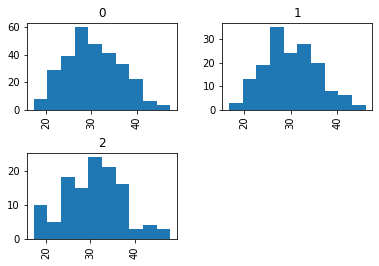

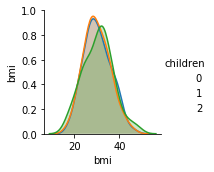

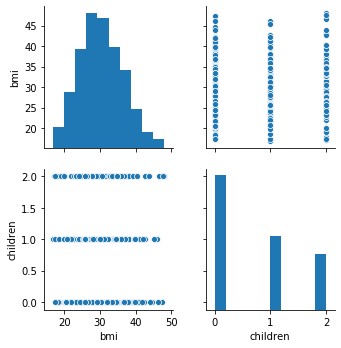

In [25]:
#### d. Is the distribution of bmi across women with no children, one child and two children, the same? ####
## first get the subset of dataframe of women with 0,1,2 children and the columns of only bmi and children.
df4=insdata[insdata.sex.isin(['female']) & insdata.children.isin([0,1,2])][['bmi','children']]
df4.head() ## (566, 7) is shape
df4.hist(by="children",column='bmi')
sns.pairplot(df4, vars=["bmi"],hue="children")
sns.pairplot(df4)
df4.corr()

## insights
# Based on the below graphs and corelation value it seems there is no effect of children on women. 
# For statistical evidence, we will check this with f-test

In [26]:
# we will do the f-test to check this

Ho = "children has no effect on bmi"   # Null Hypothesis
Ha = "children has an effect on bmi"   # Alternate Hypothesis

zero_child = df4[df4.children == 0]
one_child = df4[df4.children == 1]
two_child = df4[df4.children == 2]

f_stat, p_value = stats.f_oneway(zero_child,one_child,two_child)

print("f_stat= ",f_stat)
print("p_value = ",p_value)


## insights
# As the p_value is greater than 0.05 (level of significant is 5%) we failed to reject the null hypothesis
# So, the distribution of bmi across women with no children, one child and two children, the same

f_stat=  [3.34472015e-01 2.30161205e+15]
p_value =  [0.71585799 0.        ]
